In [247]:
# Libraries
import pandas as pd
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols

from scipy.stats.stats import pearsonr
from scipy import stats
from scipy.stats import f_oneway



pd.set_option('display.max_rows', None)

In [161]:
%store -r parameter_2
%store -r hospitals_personalInfo

In [162]:
#parameter_2

In [163]:
# Relative frequences for answers of every question

relative_frequencies = parameter_2.apply(lambda x: x.value_counts(normalize=True))
relative_frequencies

,"1. Γίνεται συστηματική αξιολόγηση των αλλαγών που τίθενται σε εφαρμογή, βάσει δυσμενών συμβάντων που έχουν αναφερθεί.",3. Το προσωπικό ενημερώνεται συχνά για τα δυσμενή συμβάντα που λαμβάνουν χώρα.,5. Το προσωπικό συζητά τρόπους πρόληψης δυσμενών συμβάντων ώστε να μην επαναληφθούν.
1.0,0.095041,0.020833,0.012448
2.0,0.148760,0.079167,0.128631
3.0,0.355372,0.166667,0.195021
4.0,0.285124,0.395833,0.410788
5.0,0.115702,0.337500,0.253112


In [164]:
parameter_2.describe()

,"1. Γίνεται συστηματική αξιολόγηση των αλλαγών που τίθενται σε εφαρμογή, βάσει δυσμενών συμβάντων που έχουν αναφερθεί.",3. Το προσωπικό ενημερώνεται συχνά για τα δυσμενή συμβάντα που λαμβάνουν χώρα.,5. Το προσωπικό συζητά τρόπους πρόληψης δυσμενών συμβάντων ώστε να μην επαναληφθούν.
count,242.000000,240.000000,241.000000
mean,3.177686,3.950000,3.763485
std,1.118237,1.005008,1.011432
min,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000
50%,3.000000,4.000000,4.000000
75%,4.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000


In [165]:
hospitals_personalInfo

,Τους τελευταίους 12 μήνες πόσα δυσμενή συμβάντα έχετε αναφέρει; (Αναφέρετε έναν αριθμό),1. Φύλο:,2. Ηλικία…,3α. Ποια είναι η βασική σας εκπαίδευση;,3β. Άλλες σπουδές:,7. Πόσο χρονικό διάστημα εργάζεστε στο συγκεκριμένο Νοσοκομείο;,8. Πόσο χρονικό διάστημα εργάζεστε στη συγκεκριμένη μονάδα ?,9. Συνήθως πόσες ώρες την εβδομάδα εργάζεστε στο συγκεκριμένο Νοσοκομείο; …,10. Τι θέση κατέχετε στο νοσοκομείο που εργάζεστε;
0,4.0,Γυναίκα,23.0,3. Πανεπιστημιακή (Π.Ε.),3. Διδακτορικό δίπλωμα,23.0,12.0,23.0,4. ΤΕ Νοσηλευτής
1,NaN,Γυναίκα,45.0,3. Πανεπιστημιακή (Π.Ε.),2. Μεταπτυχιακές σπουδές,23.0,NaN,12.0,4. ΤΕ Νοσηλευτής
2,10.0,Άνδρας,55.0,2. Τεχνολογική (Τ.Ε.),3. Διδακτορικό δίπλωμα,33.0,3.0,60.0,4. ΤΕ Νοσηλευτής
3,NaN,Άνδρας,61.0,3. Πανεπιστημιακή (Π.Ε.),3. Διδακτορικό δίπλωμα,30.0,30.0,NaN,NaN
4,2.0,Άνδρας,50.0,2. Τεχνολογική (Τ.Ε.),2. Μεταπτυχιακές σπουδές,25.0,11.0,41.0,4. ΤΕ Νοσηλευτής
5,NaN,Γυναίκα,48.0,3. Πανεπιστημιακή (Π.Ε.),2. Μεταπτυχιακές σπουδές,15.0,15.0,52.0,2. Ειδικός ιατρός
6,6.0,Άνδρας,55.0,2. Τεχνολογική (Τ.Ε.),3. Διδακτορικό δίπλωμα,33.0,11.0,40.0,4. ΤΕ Νοσηλευτής
7,NaN,Γυναίκα,39.0,2. Τεχνολογική (Τ.Ε.),2. Μεταπτυχιακές σπουδές,10.0,9.0,40.0,4. ΤΕ Νοσηλευτής
8,NaN,Γυναίκα,40.0,2. Τεχνολογική (Τ.Ε.),2. Μεταπτυχιακές σπουδές,14.0,2.0,50.0,4. ΤΕ Νοσηλευτής
9,NaN,Γυναίκα,55.0,2. Τεχνολογική (Τ.Ε.),2. Μεταπτυχιακές σπουδές,26.0,3.0,45.0,4. ΤΕ Νοσηλευτής


# Correlation Analysis

In [166]:
# individual score to parameter 

parameter = parameter_2

individualScore = parameter.sum(axis=1)/3


0      1.666667
1      2.000000
2      4.000000
3      4.000000
4      3.666667
5      3.666667
6      4.000000
7      4.333333
8      4.333333
9      3.666667
10     3.000000
11     4.000000
12     3.000000
13     4.666667
14     3.666667
15     4.666667
16     4.666667
17     4.000000
18     4.000000
19     4.000000
20     4.666667
21     4.666667
22     3.333333
23     4.666667
24     3.333333
25     5.000000
26     4.666667
27     4.666667
28     4.000000
29     5.000000
30     3.333333
31     3.000000
32     4.000000
33     3.000000
34     3.333333
35     4.666667
36     5.000000
37     5.000000
38     4.666667
39     4.000000
40     5.000000
41     4.333333
42     4.000000
43     4.333333
44     3.333333
45     4.000000
46     4.000000
47     4.333333
48     4.333333
49     4.666667
50     5.000000
51     5.000000
52     4.333333
53     4.000000
54     4.000000
55     3.000000
56     3.000000
57     4.000000
58     4.333333
59     5.000000
60     5.000000
61     5.000000
62     5

### Gender correlation

In [168]:
gender = hospitals_personalInfo['1. Φύλο: ']

In [169]:
# create a frame with gender and score
gender = pd.concat([gender,individualScore],axis=1)

gender.columns = ['Gender','Score']

male = []
female = []


#create table for every category
for index, row in gender.iterrows(): 
    if row['Gender'] == 'Γυναίκα':
        female.append(row['Score'])
    else:
        male.append(row['Score'])
        

In [170]:
from statistics import mean, pvariance
avg1 = mean(male)
var1 = pvariance(male)
avg2 = mean(female)
var2 = pvariance(female)

print("avg male =", avg1,"var male =",var1,"avg female =", avg2,"var female =",var2 )

avg male = 3.311111111111111 var male = 1.0795061728395061 avg female = 3.706114398422091 var female = 0.7413761578531719


In [171]:
tStat, pValue = stats.ttest_ind(female, male, equal_var = False) #run independent sample T-Test
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the

P-Value:0.004911840660722185 T-Statistic:2.8655890854332955


In [172]:
#create table for every category

# for index, row in gender.iterrows(): 
#     if row['Gender'] == 'Γυναίκα':
#         gender["Gender"].loc[index] = 0
#     elif row['Gender'] == 'Άνδρας':
#         gender["Gender"].loc[index] = 1

    

### Age Correlation

In [173]:
age = hospitals_personalInfo['2. Ηλικία…']

In [174]:
# create a frame with age and score
age = pd.concat([age,individualScore],axis=1)
age.columns = ['Age','Score']
age = age.dropna()

In [179]:

x = age['Age']
y = age['Score']
#calculation correlation coefficient and p-value between x and y
print("(corr,p-val) =",pearsonr(x, y))



(corr,p-val) = (0.1545833199933938, 0.01796940164961494)


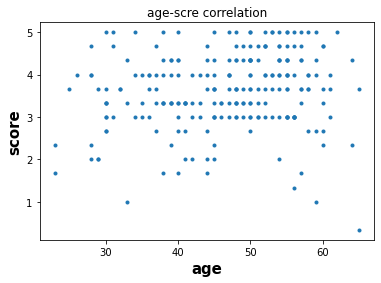

In [187]:
plt.plot(x, y, '.')
plt.title("age-scre correlation")
plt.xlabel("age",fontweight="bold", fontsize="15")
plt.ylabel("score",fontweight="bold", fontsize="15")

plt.show()

### Working Hours

In [195]:
hours = hospitals_personalInfo['9. Συνήθως πόσες ώρες την εβδομάδα εργάζεστε στο συγκεκριμένο Νοσοκομείο; …']

In [197]:
# create a frame with age and score
hours = pd.concat([hours,individualScore],axis=1)
hours.columns = ['Hours','Score']
hours = hours.dropna()

In [204]:
x = hours['Hours']
y = hours['Score']
#calculation correlation coefficient and p-value between x and y
print("(r,p-val) =",pearsonr(x, y))


(r,p-val) = (-0.06860605996547572, 0.3001952713235762)


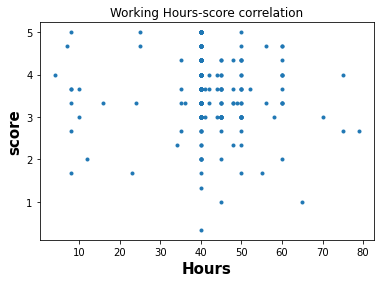

In [205]:
plt.plot(x, y, '.')
plt.title("Working Hours-score correlation")
plt.xlabel("Hours",fontweight="bold", fontsize="15")
plt.ylabel("score",fontweight="bold", fontsize="15")

plt.show()

### Profession Correlation

In [212]:
profession = hospitals_personalInfo['10. Τι θέση κατέχετε στο νοσοκομείο που εργάζεστε;']

profession= pd.concat([profession,individualScore],axis=1)

profession.columns = ['Profession','Score']

profession = profession.dropna()

In [226]:
print("Mean")
profession.groupby('Profession')['Score'].mean()

Mean


Profession
1. Ειδικευόμενος ιατρός    2.864198
2. Ειδικός ιατρός          3.438596
3. ΠΕ Νοσηλευτής           3.823529
4. ΤΕ Νοσηλευτής           3.778607
5. ΔΕ Βοηθός Νοσηλευτή     3.901961
Name: Score, dtype: float64

In [227]:
print("Variance")
profession.groupby('Profession')['Score'].var()

Variance


Profession
1. Ειδικευόμενος ιατρός    0.899652
2. Ειδικός ιατρός          0.667299
3. ΠΕ Νοσηλευτής           0.612745
4. ΤΕ Νοσηλευτής           0.706673
5. ΔΕ Βοηθός Νοσηλευτή     0.482843
Name: Score, dtype: float64

In [241]:
eidikevomenos_iatros = []
eidikos_iatros = []
pe_nosileftis = []
te_nosileftis = []
de_voithos_nosilefti = []

#create table for every category of profession
for index, row in profession.iterrows(): 
    if row['Profession'] == '1. Ειδικευόμενος ιατρός':
        eidikevomenos_iatros.append(row['Score'])
    elif row['Profession'] == '2. Ειδικός ιατρός':
        eidikos_iatros.append(row['Score'])
    elif row['Profession'] == '3. ΠΕ Νοσηλευτής':
        pe_nosileftis.append(row['Score'])
    elif row['Profession'] == '4. ΤΕ Νοσηλευτής':
        te_nosileftis.append(row['Score'])
    else:
        de_voithos_nosilefti.append(row['Score'])
        
te_nosileftis


[1.6666666666666667,
 2.0,
 4.0,
 3.6666666666666665,
 4.0,
 4.333333333333333,
 4.333333333333333,
 3.6666666666666665,
 3.0,
 4.0,
 3.0,
 4.666666666666667,
 3.6666666666666665,
 4.666666666666667,
 4.0,
 4.0,
 4.0,
 4.666666666666667,
 4.666666666666667,
 3.3333333333333335,
 4.666666666666667,
 3.3333333333333335,
 5.0,
 4.666666666666667,
 4.666666666666667,
 5.0,
 3.0,
 5.0,
 4.0,
 4.333333333333333,
 4.0,
 4.0,
 4.333333333333333,
 4.333333333333333,
 4.666666666666667,
 5.0,
 4.333333333333333,
 4.0,
 4.0,
 4.0,
 5.0,
 5.0,
 5.0,
 5.0,
 3.6666666666666665,
 3.0,
 3.0,
 3.3333333333333335,
 4.0,
 3.3333333333333335,
 4.333333333333333,
 4.333333333333333,
 4.666666666666667,
 4.666666666666667,
 4.0,
 3.3333333333333335,
 4.333333333333333,
 4.0,
 5.0,
 4.333333333333333,
 3.6666666666666665,
 4.0,
 3.6666666666666665,
 3.0,
 3.6666666666666665,
 4.0,
 4.666666666666667,
 4.333333333333333,
 5.0,
 4.0,
 3.0,
 4.333333333333333,
 1.6666666666666667,
 4.333333333333333,
 3.6666666

In [248]:
f_oneway(eidikevomenos_iatros, eidikos_iatros, pe_nosileftis,te_nosileftis,de_voithos_nosilefti)

F_onewayResult(statistic=7.8856912092961435, pvalue=5.7097546709742624e-06)

In [233]:
profession

,Profession,Score
0,4. ΤΕ Νοσηλευτής,1.666667
1,4. ΤΕ Νοσηλευτής,2.000000
2,4. ΤΕ Νοσηλευτής,4.000000
4,4. ΤΕ Νοσηλευτής,3.666667
5,2. Ειδικός ιατρός,3.666667
6,4. ΤΕ Νοσηλευτής,4.000000
7,4. ΤΕ Νοσηλευτής,4.333333
8,4. ΤΕ Νοσηλευτής,4.333333
9,4. ΤΕ Νοσηλευτής,3.666667
10,4. ΤΕ Νοσηλευτής,3.000000
